In [45]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "lines.markersize": 10})
os.chdir('/mnt/user-home/kddcup-2020')

In [38]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [11]:
file_dir = 'data/total_order_cancellation_probability'
cancel_prob_files = [f for f in os.listdir(file_dir) if f.endswith('_prob')]
columns = ['order_id'] + [f'{200*x}_m_cancel_prob' for x in range(1, 11)]

In [14]:
def read_cancel_probs_to_df():
    dfs = (pd.read_csv(Path(file_dir, f), names=columns).assign(filename=f) for f in cancel_prob_files)
    return pd.concat(dfs, ignore_index=True)

In [15]:
frame = read_cancel_probs_to_df()

In [16]:
frame.head()

,order_id,200_m_cancel_prob,400_m_cancel_prob,600_m_cancel_prob,800_m_cancel_prob,1000_m_cancel_prob,1200_m_cancel_prob,1400_m_cancel_prob,1600_m_cancel_prob,1800_m_cancel_prob,2000_m_cancel_prob,filename
0,9a6ccfd3bb8de8b0f0d37e1a8ee4ec6d,0.018040,0.021702,0.024320,0.034376,0.049099,0.071703,0.082755,0.095151,0.105233,0.112724,order_20161112_cancel_prob
1,ff1b51bfb17f0bae4a41b316eea59504,0.009087,0.009828,0.010600,0.018724,0.025588,0.034869,0.039791,0.043892,0.046897,0.054119,order_20161112_cancel_prob
2,0cb9a3bbb2f77863bcc293af446fe97d,0.007664,0.008261,0.009048,0.013591,0.016734,0.022055,0.025207,0.028880,0.031560,0.035530,order_20161112_cancel_prob
3,bcec3a48b0ae143a9a915decbc99f7b2,0.010963,0.009354,0.009980,0.018033,0.023757,0.039394,0.045599,0.055533,0.066521,0.084223,order_20161112_cancel_prob
4,00dba89d5e99d990f7fcac0150ab829e,0.304887,0.389517,0.455997,0.483952,0.530120,0.540859,0.590684,0.618337,0.756589,0.833906,order_20161112_cancel_prob


In [18]:
desc = frame.describe()
desc

,200_m_cancel_prob,400_m_cancel_prob,600_m_cancel_prob,800_m_cancel_prob,1000_m_cancel_prob,1200_m_cancel_prob,1400_m_cancel_prob,1600_m_cancel_prob,1800_m_cancel_prob,2000_m_cancel_prob
count,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06,7.065937e+06
mean,3.493870e-02,3.866776e-02,4.176073e-02,5.007157e-02,5.920863e-02,7.455933e-02,8.571890e-02,9.848048e-02,1.123070e-01,1.271732e-01
std,6.093480e-02,7.272500e-02,8.010853e-02,8.128915e-02,8.938623e-02,9.887756e-02,1.110656e-01,1.223765e-01,1.429795e-01,1.603257e-01
min,3.800000e-05,4.000000e-05,4.500000e-05,5.500000e-05,7.100000e-05,1.050000e-04,1.310000e-04,1.530000e-04,1.900000e-04,2.090000e-04
25%,1.001000e-02,9.226000e-03,9.502000e-03,1.678800e-02,2.229400e-02,3.182500e-02,3.675900e-02,4.313100e-02,4.745100e-02,5.332200e-02
50%,1.194800e-02,1.104800e-02,1.125000e-02,1.975500e-02,2.643200e-02,3.771500e-02,4.377000e-02,5.214800e-02,5.810200e-02,6.638600e-02
75%,1.673900e-02,1.655100e-02,1.727500e-02,2.655400e-02,3.520800e-02,4.931000e-02,5.738800e-02,6.813500e-02,7.626700e-02,8.954900e-02
max,8.304870e-01,8.328710e-01,8.361460e-01,8.270420e-01,8.268840e-01,8.143670e-01,8.073840e-01,8.490600e-01,8.904770e-01,9.106160e-01


In [55]:
mean_df = pd.DataFrame(data=[(200 * i, desc[f'{200 * i}_m_cancel_prob']['mean']) for i in range(1, 11)], columns=['distance', 'cancel_prob'])
med_df = pd.DataFrame(data=[(200 * i, desc[f'{200 * i}_m_cancel_prob']['50%']) for i in range(1, 11)], columns=['distance', 'cancel_prob'])
mean_df

,distance,cancel_prob
0,200,0.034939
1,400,0.038668
2,600,0.041761
3,800,0.050072
4,1000,0.059209
5,1200,0.074559
6,1400,0.085719
7,1600,0.098480
8,1800,0.112307
9,2000,0.127173


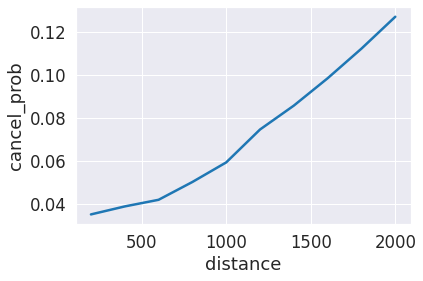

In [23]:
sns.lineplot(data=mean_df, x='distance', y='cancel_prob')

In [31]:
def stack_probs(df):
    stacked = df[[f'{200*x}_m_cancel_prob' for x in range(1, 11)]].stack().reset_index()
    stacked['distance'] = stacked['level_1'].apply(lambda s: s[:s.find('_m')])
    stacked['cancel_prob'] = stacked[0]
    return stacked[['distance', 'cancel_prob']].copy()
stacked = stack_probs(frame)

In [35]:
stacked.shape

(70659370, 2)

In [68]:
class LogitRegression(LinearRegression):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

log_r = LogitRegression()
log_r.fit(stacked[['distance']], stacked[['cancel_prob']])

LogitRegression()

In [69]:
stacked['pred'] = log_r.predict(stacked[['distance']])

In [70]:
rmse(stacked['cancel_prob'], stacked['pred'])

0.10964887573934771

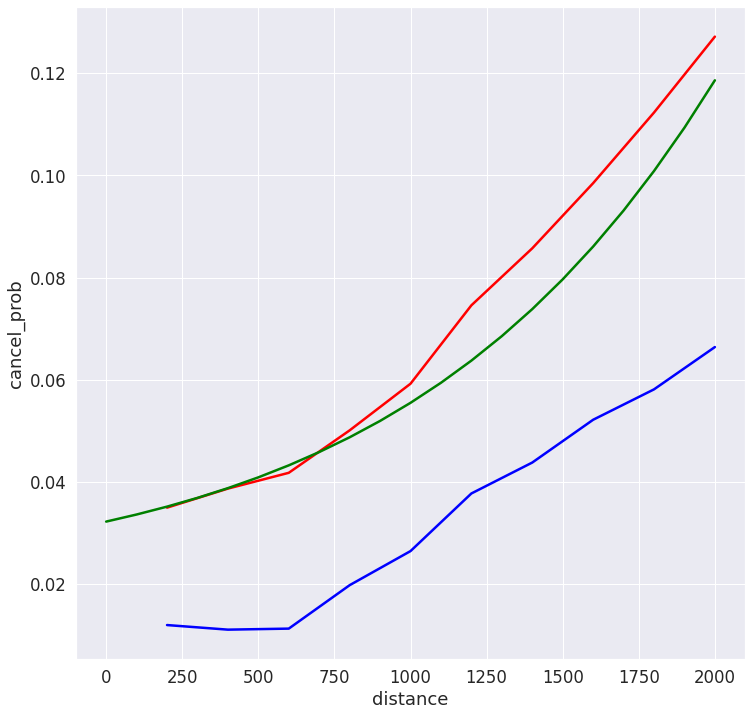

In [78]:
distances = np.arange(0, 2100, 100)
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.lineplot(data=mean_df, x='distance', y='cancel_prob', ax=ax, color='red')
sns.lineplot(data=med_df, x='distance', y='cancel_prob', ax=ax, color='blue')
sns.lineplot(x=distances, y=log_r.predict(distances.reshape(-1, 1))[:, 0] + 0.02, color='green')

In [72]:
log_r.coef_, log_r.intercept_

(array([[0.00109042]]), array([-4.39349586]))

In [73]:
stacked.head(10)

,distance,cancel_prob,pred
0,200,0.018040,0.015136
1,400,0.021702,0.018756
2,600,0.024320,0.023220
3,800,0.034376,0.028716
4,1000,0.049099,0.035466
5,1200,0.071703,0.043731
6,1400,0.082755,0.053814
7,1600,0.095151,0.066062
8,1800,0.105233,0.080858
9,2000,0.112724,0.098620


In [79]:
1 / (np.exp(4.39349586 - 0.00109042 * 200) + 1) + 0.02

0.03513623386518351